# Laboratorio 4: Corrección de Errores

Los circuitos dinámicos también tienen el potencial de ser de gran ayuda con la corrección de errores en las computadoras cuánticas. Si no estás familiarizado con la corrección de errores cuánticos, no te preocupes, comenzaremos presentando el concepto con datos clásicos y luego aplicaremos ese enfoque a las computadoras cuánticas.

La corrección de errores es importante para la computación cuántica, ya que los qubits físicos son susceptibles al ruido. Esto significa que siempre tendremos una pequeña probabilidad de que ocurran errores al ejecutar nuestros circuitos. La corrección de errores nos ayudará a lidiar con esas pequeñas probabilidades y garantizar que obtengamos los resultados correctos al final, corrigiendo los errores a medida que ocurren.

Si deseas obtener más información sobre la corrección de errores cuántica o algunos ejercicios adicionales, el **[Libro de Texto de Qiskit tiene una excelente sección sobre el tema](https://learn.qiskit.org/course/quantum-hardware/introduction-to-quantum-error-correction-via-the-repetition-code)**


Entonces, preparemos todo lo que necesitamos y luego comencemos.

In [1]:
# Importing all the parts we will need.
from typing import List, Optional

from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister, Aer
from qiskit.providers.fake_provider import FakeManilaV2
from qiskit.visualization import plot_histogram


import warnings

warnings.filterwarnings("ignore")

import math

pi = math.pi

## Corrección de Errores Clásica

¿Por qué se creó la corrección de errores en primer lugar?

Piensa en hablar con alguien por teléfono cuando tengas mala recepción. A pesar de tus mejores esfuerzos para hablar con claridad, a veces el mensaje se cambia o se arruina. "Vamos a almorzar con Fred el viernes" se convierte en "Vamos a golpear a Fred el viernes". El fin de semana de Fred se puso mucho peor.

Cada vez que envías un mensaje, incluso uno tan simple como un bit, siempre existe la posibilidad de que ocurran pequeños errores. Si envías un bit de datos a través de un cable, puede haber una pequeña posibilidad de que el bit se invierta, por lo que en lugar de un `0`, el destinatario obtenga un `1`. Esto puede suceder con más frecuencia si el cable es viejo y está corroído. Lo mismo podría suceder potencialmente al almacenar datos: piensa en un CD que se raya. En el peor de los casos, los errores podrían incluso ocurrir durante un cálculo en tu procesador.

La posibilidad de errores es un problema conocido para la información clásica.

Imaginemos que la posibilidad de que un bit se voltee accidentalmente (también conocido como error) es del 10%. Esto significaría que por cada bit de datos que enviamos, existe una posibilidad entre diez de que el bit recibido sea incorrecto. Podrías enviar un mensaje de `0` diez veces, pero el mensaje recibido podría decir '0001000000'. Ya puedes ver el problema.

Una de las soluciones más simples es usar algo de repetición. Mi bit de datos `1` se puede codificar como `111` y, de la misma manera, un `0` se codifica como `000`. Cada bit de datos ahora se codifica con tres bits en lugar de uno solo.

¿Por qué esto ayuda?

Si ahora enviamos `000` y ocurre un error, entonces el receptor podría ver 001. Dado que el receptor sabe que _debería_ haber obtenido 000 o 111, podría deducir que probablemente se envió 000, y se invirtió un solo bit. ¡Errores, corregidos!

Pero, ¿y si se producen varios errores? Nuestro mensaje se convierte en `011` y el destinatario ahora asume que queríamos enviar `111`. ¡Verdadero error! Al usar la repetición, reducimos la posibilidad de que eso suceda, pero no la eliminamos. Entonces, ¿cuánto reducimos exactamente la tasa de error? ¡Vamos a investigar!

Puedes encontrar la probabilidad de cómo cambian los errores con el siguiente código:

In [2]:
# Probability for a 000 message to contain one error:
p1 = 0.10

# Calculating the probability of a message containing 2 or 3 errors:
p3 = 3 * p1 * p1 * (1 - p1) + p1 * p1 * p1

print("Percent chance the 000 message has one error: {}".format(p1 * 100))
print("Percent chance the 000 message has 2 or 3 errors: {:.4f}".format(p3 * 100))

Percent chance the 000 message has one error: 10.0
Percent chance the 000 message has 2 or 3 errors: 2.8000


Al usar la repetición, reducimos la posibilidad de que los errores arruinen nuestro mensaje a solo el 2.8% del tiempo (cuando se invierten 2 o más bits). Esto es mucho mejor que el 10% de las veces que encontraríamos si solo usáramos un bit. Sin embargo, acabamos de compensar la tasa de error del 10%. También puedes compensar las tasas de error, pruébalo. Cambia el porcentaje de error `p1` para ver cómo esto afectaría la probabilidad de que ocurran 2 o más errores.

Sabiendo cómo puede ayudar la repetición, podríamos implementar un programa simple que "codifique" el mensaje anterior. Transformaría 1 bit en 3 bits. Entonces también podríamos escribir un programa simple para "decodificar" el mensaje, tomando los 3 bits y volviéndolos a convertir en uno. De hecho, suena como un gran primer ejercicio para intentar:

### Ejercicio 1

Como introducción, construyamos un "decodificador" que decodifique un estado de 3 bits usando los qubits 0, 1 y 2 en un solo bit en el qubit 4, siguiendo las reglas a continuación:

- 000->0
- 001->0
- 010->0
- 100->0
- 111->1
- 110->1
- 101->1
- 011->1

_Hint: solo necesitamos invertir bits, por lo que no se necesitan compuertas que introduzcan una fase. Y solo necesitamos **[compuertas básicas](https://qiskit.org/documentation/apidoc/circuit_library.html#standard-gates)**_

In [3]:
# Creating a simple decoder for the classical case
def create_decoder(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    # Expect a bit being encoded in the first 3 qubits and decode it into the 4th qubit
    # Make sure values of the first 3 qubit stays the same

    qc = QuantumCircuit(qr, cr)
    q0, q1, q2, q3 = qr
    (c0,) = cr

    ####### your code goes here #######
    qc.ccx(q0,q1,q3)
    qc.ccx(q1,q2,q3)
    qc.ccx(q0,q2,q3)

    return qc

Veamos ahora cómo se vería nuestra decodificación para el caso que hemos codificado 1.

Trata de jugar con diferentes entradas (incluidas las que tienen un error), para ver cómo se comportaría tu circuito de corrección de errores en estos casos.

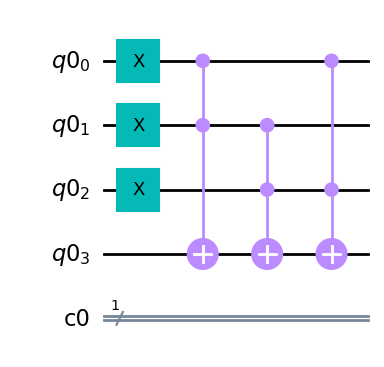

In [4]:
# We expect a bit being encoded in the first 3 qubits and decode it into the 4th qubit
qr = QuantumRegister(4)
cr = ClassicalRegister(1)

q0, q1, q2, q3 = qr

# To encode a 1. Change them to test the other encodings.
encoder = QuantumCircuit(qr, cr)
encoder.x(q0)
encoder.x(q1)
encoder.x(q2)

decoder = create_decoder(qr, cr)
qc1 = encoder.compose(decoder)

qc1.draw("mpl")

Cuando creas que tu decodificador funciona correctamente, puedes probarlo con el siguiente código:

In [5]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex4a

grade_ex4a(create_decoder(qr, cr))

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


# El Caso Cuántico

## ¿Qué hace que el Caso Cuántico sea complicado?

En el caso clásico, tener tales códigos de corrección de errores es relativamente simple, ya que podemos repetir el bit varias veces.

Por supuesto, también existen otros códigos, que son más complejos, pero al final todos los códigos tendrán algún tipo de redundancia al repetir información.

En el caso cuántico realmente no podemos hacer eso, por 2 razones principales.

1. No podemos copiar qubits, lo cual se establece en el teorema de la no clonación.

2. Medir un qubit hará que su estado colapse, lo que significa que debemos tener cuidado al trabajar con qubits entrelazados


Esto suena un poco desalentador, pero aún podemos hacer la corrección de errores.


Sin embargo, no solo necesitaremos varios qubits para almacenar la información (similar a la anterior para repetirla), sino que también necesitaremos algunos qubits ancilla adicionales, que usamos como los llamados *estabilizadores*.

La idea es que estas ancillas no estén entrelazadas con los qubits que almacenan el estado, sin embargo, aún nos dan pistas sobre posibles errores al medir.


Usaremos dos conjuntos de qubits, uno para la codificación y otro para los estabilizadores.

# Implementar un Código de Repetición Bit-flip

Preparemos todo de tal manera que podamos comenzar con la implementación de la corrección de errores.

In [6]:
# Setup a base quantum circuit for our experiments
encoding = QuantumRegister(3)
stabilizer = QuantumRegister(2)

encoding_q0, encoding_q1, encoding_q2 = encoding
stabilizer_q0, stabilizer_q1 = stabilizer

# Results of the encoding
results = ClassicalRegister(3)

result_b0, result_b1, result_b2 = results

# For measuring the stabilizer
syndrome = ClassicalRegister(2)

syndrome_b0, syndrome_b1 = syndrome

# The actual qubit which is encoded
state = encoding[0]

# The ancillas used for encoding the state
ancillas = encoding[1:]


# Initializing
def initialize_circuit() -> QuantumCircuit:
    return QuantumCircuit(encoding, stabilizer, results, syndrome)

## Inicializar el Qubit

Para proteger un estado cuántico de errores, primero debemos prepararlo.
En general podemos preparar el estado $$|\Psi_0\rangle \rightarrow |\Psi_1\rangle = (\alpha |0\rangle + \beta |1\rangle)$$
En el siguiente circuito preparamos el estado físico $$|\Psi_1\rangle = |1\rangle$$

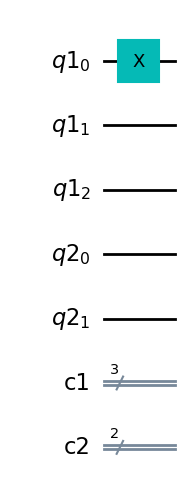

In [7]:
initial_state = initialize_circuit()

initial_state.x(encoding[0])

initial_state.draw(output="mpl")

## Codificar el Qubit

Similar al caso clásico, queremos usar la repetición para almacenar el qubit inicial.

Entonces, lo que queremos hacer es asignar nuestro estado $|\Psi_1\rangle = (\alpha |0\rangle + \beta |1\rangle)$ usando nuestra codificación $U_{en}|\Psi_0\rangle$ al estado $ (\alpha |000\rangle + \beta |111\rangle)$.

Este estado es un estado entrelazado, y cuando se mide 1 qubit, también se conoce el resultado de los otros 2 qubits.

Por lo tanto, usaremos CX para crear este estado entrelazado de 3 qubits a partir del estado inicial de 1 qubit:

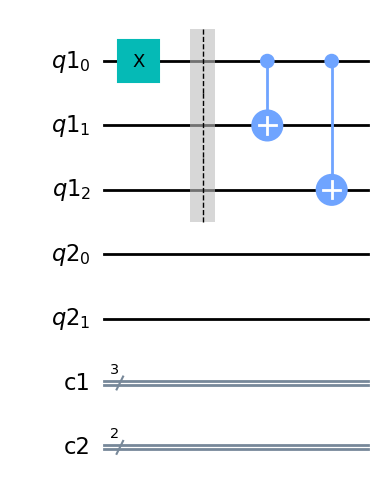

In [8]:
# Encoding using bit flip code
def encode_bit_flip(qc, state, ancillas):
    qc.barrier(state, *ancillas)
    for ancilla in ancillas:
        qc.cx(state, ancilla)
    return qc


# The circuit encoding our qubit
encoding_circuit = encode_bit_flip(initialize_circuit(), state, ancillas)

# The circuit including all parts so far
complete_circuit = initial_state.compose(encoding_circuit)
complete_circuit.draw(output="mpl")

## Preparar un Circuito de Decodificación

Para decodificar el estado original, debemos construir un decodificador que haga lo contrario, por lo que un decodificador $U_{de}|\Psi_0\rangle$ que asigna $ (\alpha |000\rangle + \beta |111\rangle)$. a $|\Psi_1\rangle = (\alpha |0\rangle + \beta |1\rangle)$

Como hace exactamente lo contrario, podemos invertir nuestro codificador:

$U_{de} = U_{en}^\dagger$

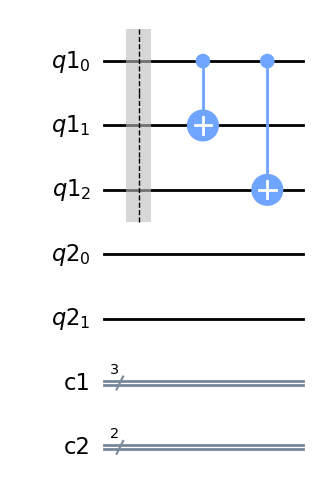

In [9]:
# Decoding (doing the reverse)
def decode_bit_flip(qc, state, ancillas):
    qc.barrier(state, *ancillas)
    for ancilla in ancillas:
        qc.cx(state, ancilla)
    return qc


decoding_circuit = decode_bit_flip(initialize_circuit(), state, ancillas)

decoding_circuit.draw(output="mpl")

## Medir Estabilizadores

Hemos visto anteriormente que podemos entrelazar un qubit $A$ con otro qubit $B$ usando un CX con $A$ como objetivo y $B$ como fuente (si $B$ ya estaba en superposición o entrelazado).

Luego, podemos desentrelazarlo nuevamente usando otro CX en $A$ como objetivo con $B$ como fuente (u otro qubit que está completamente entrelazado y correlacionado con $A$).


Dado que queremos medir nuestros estabilizadores para obtener una indicación de los posibles errores que se produjeron, es importante que NO estén entrelazados con los qubits que codifican el estado.


Conociendo este hecho, está claro que necesitamos un número par de compuertas CX aplicadas a cada estabilizador. Además, para que el estabilizador sea útil, medirlo debe decirnos si ocurrió un error de cambio de bit y en cuál de los 3 qubits de codificación ocurrió.

### Ejercicio 2

Calcular bits de síndrome, de modo que puedan medirse para detectar errores de cambio de bit único. Hemos incluido un código que medirá los bits del síndrome y restablecerá los qubits del estabilizador al estado `0`.

Hay diferentes formas de hacer esto, así que obtengamos un estabilizador con la codificación más simple posible:

`00` -> No ocurrió ningún error

`01` -> Ocurrió un error en el qubit 0 (el primer qubit)

`10` -> Ocurrió un error en el qubit 1 (el segundo qubit)

`11` -> Ocurrió un error en el qubit 2 (el tercer qubit)


*Hint: Los 3 qubits de codificación deben estar perfectamente correlacionados, si no lo están, en uno de ellos ocurrió un error de cambio de bit (bit flip).*

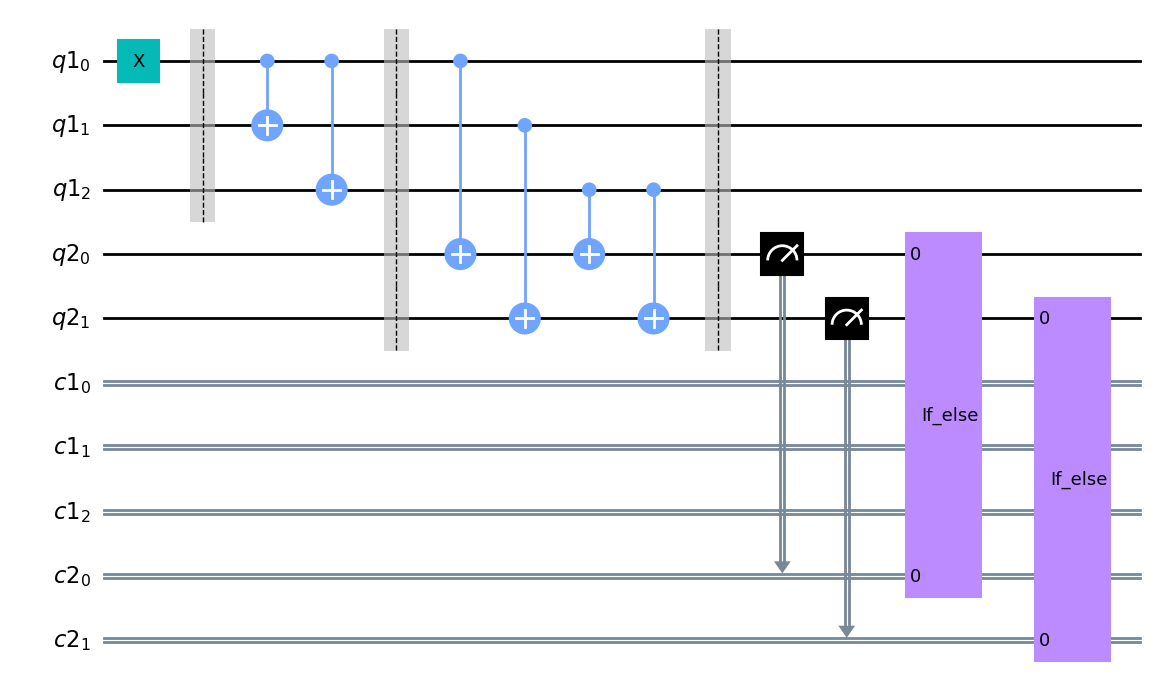

In [10]:
# Add functions such that the classical bits can be used to see which qubit is flipped in the case a single qubit is flipped.
# Use 2 classical bits for it.
# 0 = 00 = no qubit flipped
# 1 = 01 = first qubit (qubit 0) flipped
# 2 = 10 second qubit (qubit 1) flipped
# 3 = 11 = third qubit (qubit 2) flipped
def measure_syndrome_bit(qc, encoding, stabilizer):
    qc.barrier()
    encoding_q0, encoding_q1, encoding_q2 = encoding
    stabilizer_q0, stabilizer_q1 = stabilizer

    ####### your code goes here #######
    qc.cx(encoding_q0,stabilizer_q0)
    qc.cx(encoding_q1,stabilizer_q1)
    qc.cx(encoding_q2,stabilizer_q0)
    qc.cx(encoding_q2,stabilizer_q1)

    ####### don't edit the code below #######
    qc.barrier()
    qc.measure(stabilizer, syndrome)
    with qc.if_test((syndrome_b0, 1)):
        qc.x(stabilizer_q0)
    with qc.if_test((syndrome_b1, 1)):
        qc.x(stabilizer_q1)

    return qc


syndrome_circuit = measure_syndrome_bit(initialize_circuit(), encoding, stabilizer)

complete_circuit = initial_state.compose(encoding_circuit).compose(syndrome_circuit)
complete_circuit.draw("mpl")

In [11]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex4b

grade_ex4b(complete_circuit)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Corrección de Errores

Ahora podemos construir estabilizadores y al medirlos obtenemos los síndromes de error. Por supuesto, no solo queremos obtener indicaciones si se produjo un error, sino que también queremos poder corregir los errores.

Ahora usaremos circuitos dinámicos para usar nuestras mediciones de síndrome con el fin de corregir posibles errores. Similar al caso clásico, solo podemos corregir como máximo 1 error, si quisiéramos corregir más, necesitaríamos un código más largo con 5 qubits de codificación o más.

Dado que elegimos nuestras medidas de síndrome anteriores de manera inteligente, ahora debería ser bastante fácil corregir los errores, ya que sabemos exactamente cuál de los qubits está invertido, en el caso de un solo error.

### Ejercicio 3

Corregir los errores según los síndromes medidos.

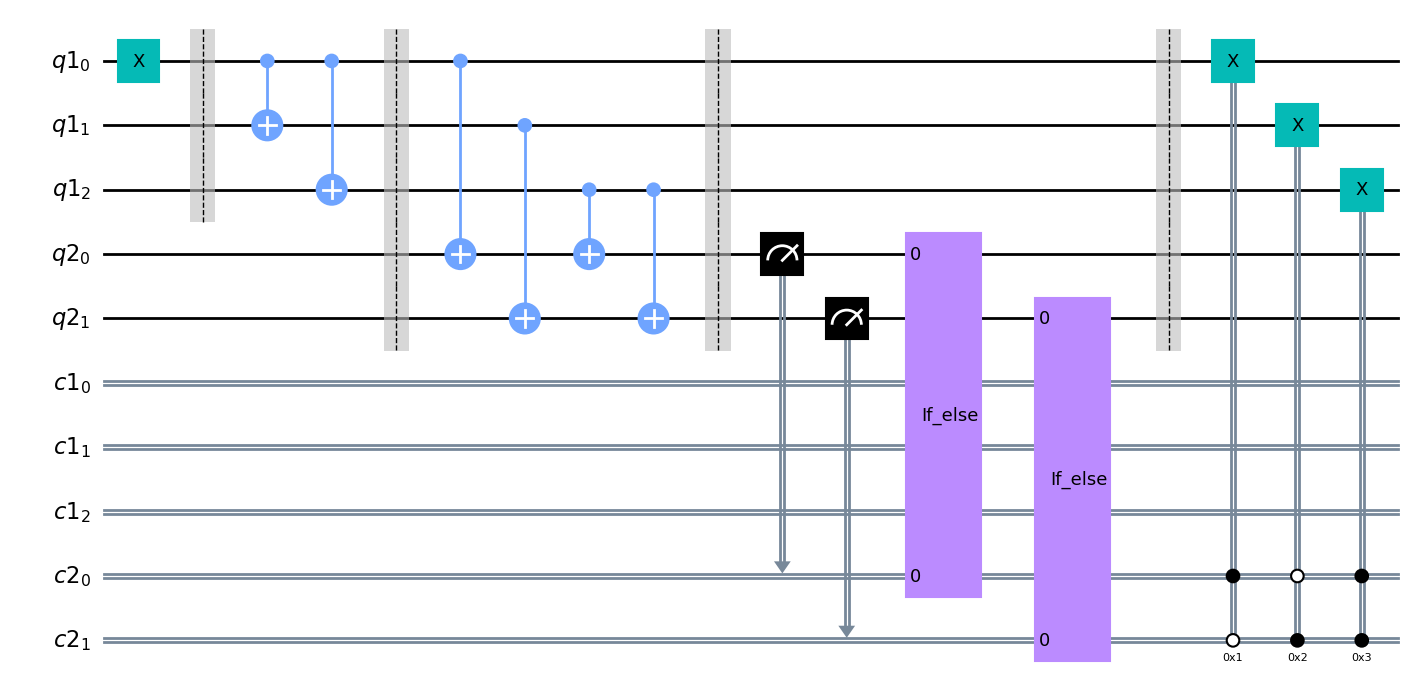

In [12]:
# Correct the errors, remember how we encoded the errors above!
def apply_correction_bit(qc, encoding, syndrome):
    qc.barrier()
    encoding_q0, encoding_q1, encoding_q2 = encoding

    ####### your code goes here #######
    qc.x(encoding_q0).c_if(syndrome, 1)
    qc.x(encoding_q1).c_if(syndrome, 2)
    qc.x(encoding_q2).c_if(syndrome, 3)

    return qc


correction_circuit = apply_correction_bit(initialize_circuit(), encoding, syndrome)
complete_circuit = (
    initial_state.compose(encoding_circuit)
    .compose(syndrome_circuit)
    .compose(correction_circuit)
)
complete_circuit.draw(output="mpl")

La única parte que falta ahora es medir los qubits de codificación. Aplicaremos el circuito decodificador antes de medir para recuperar el estado inicial.

Si todo funciona perfectamente sin errores, sería suficiente medir solo nuestro qubit inicial, sin embargo, como no siempre es así, medimos todos los qubits para ver si sucedió algo malo.

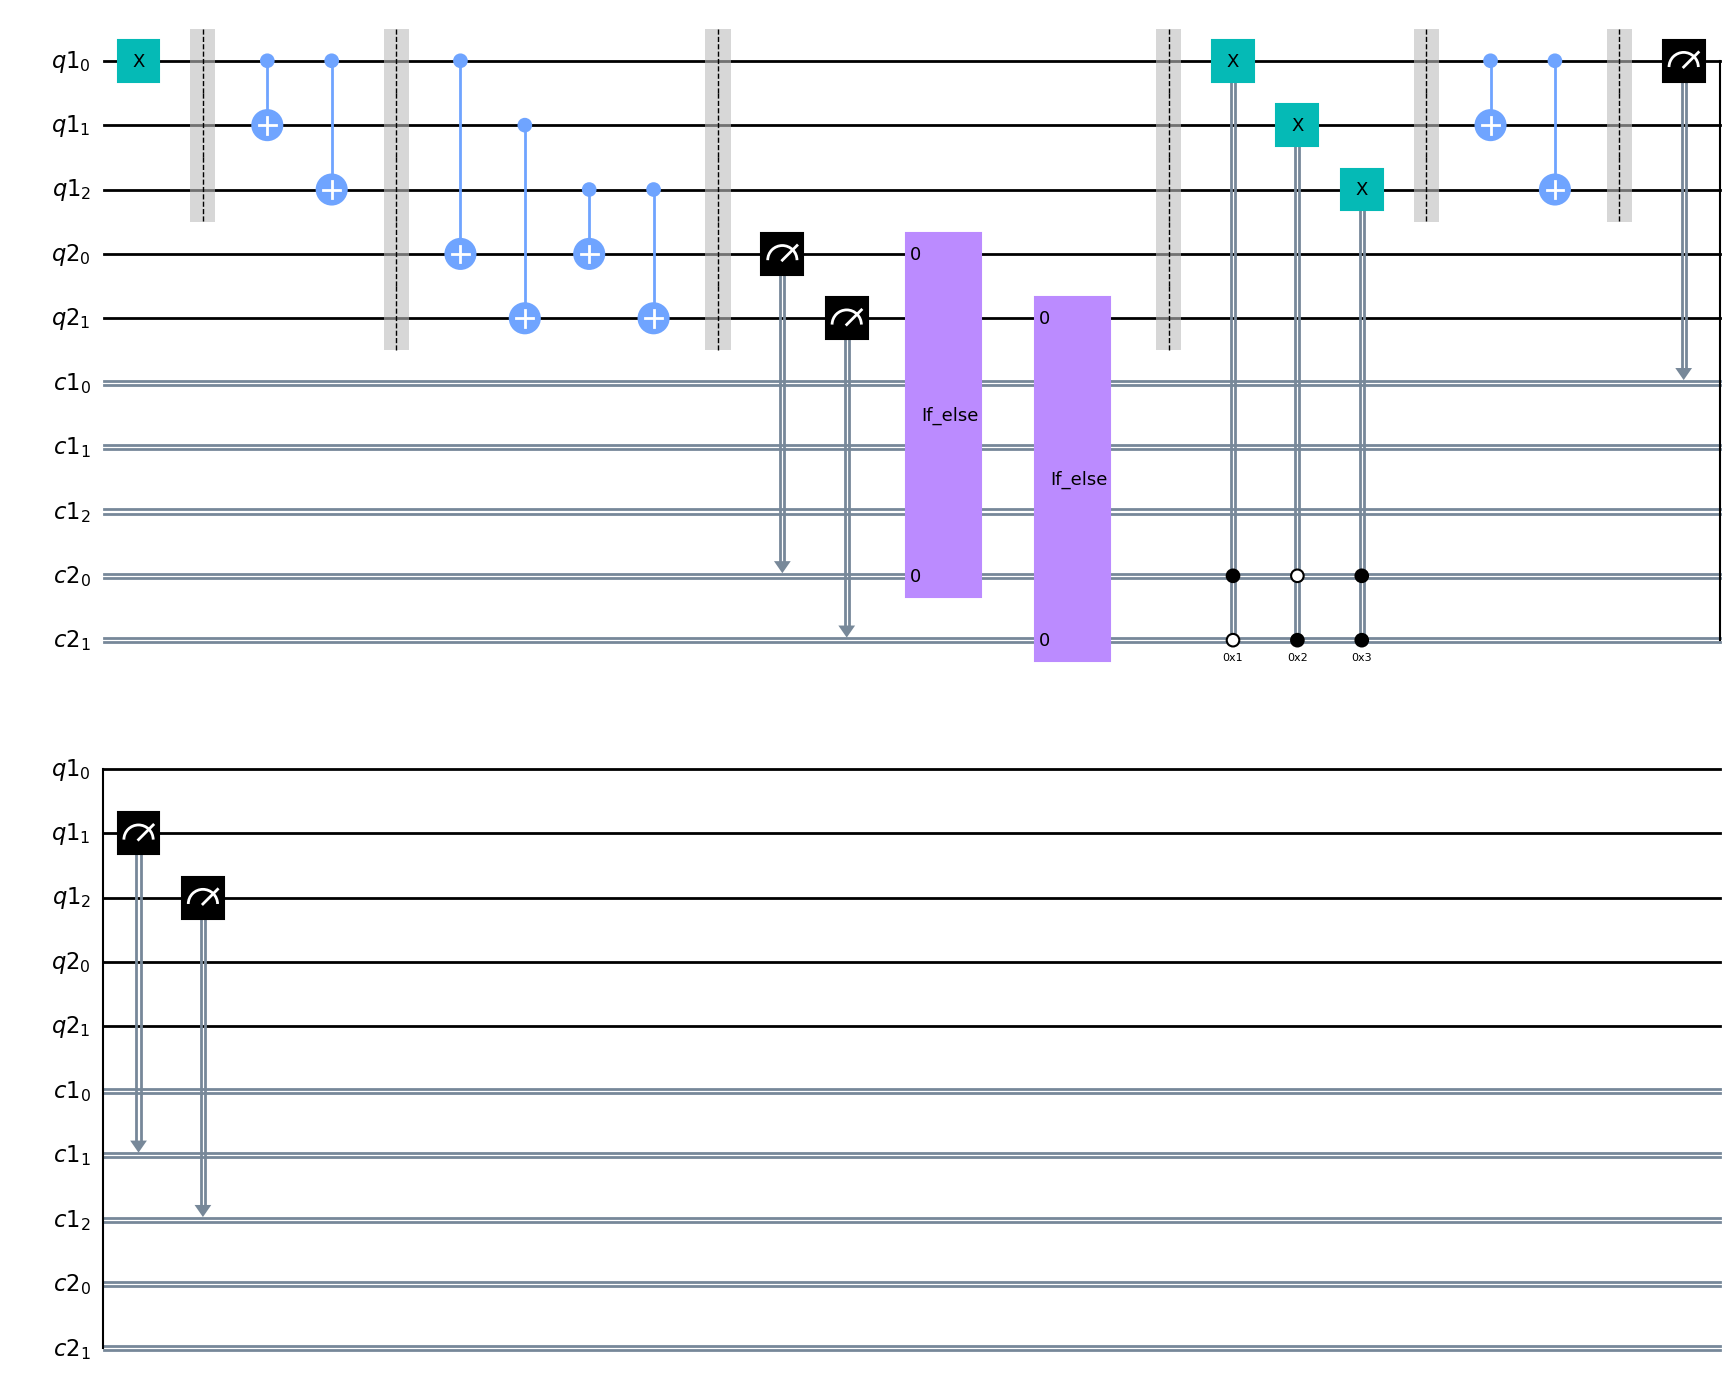

In [13]:
def apply_final_readout(qc, encoding, results):
    qc.barrier(encoding)
    qc.measure(encoding, results)
    return qc


measuring_circuit = apply_final_readout(initialize_circuit(), encoding, results)
complete_circuit = (
    initial_state.compose(encoding_circuit)
    .compose(syndrome_circuit)
    .compose(correction_circuit)
    .compose(decoding_circuit)
    .compose(measuring_circuit)
)
complete_circuit.draw(output="mpl")

In [14]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex4c

grade_ex4c(complete_circuit)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Listo para Pruebas

Ahora que tenemos todo, podemos probar si obtenemos el resultado correcto.

Haremos una primera prueba sin ningún error para asegurarnos de que la implementación fue correcta:

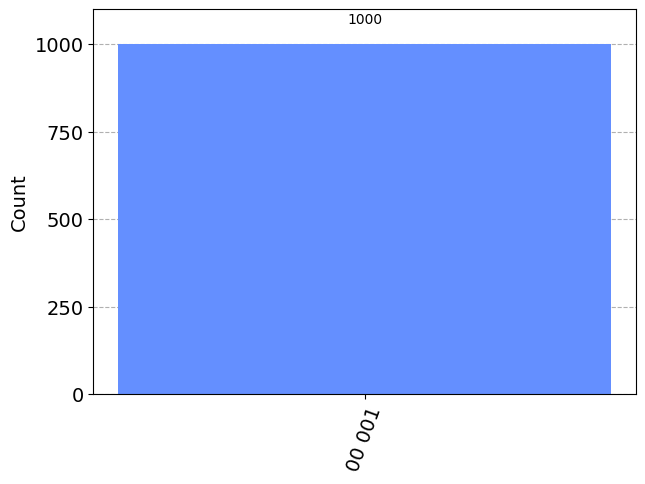

In [15]:
# We first choose a simulator as our backend without any noise
backend = Aer.get_backend("qasm_simulator")
# We run the simulation and get the counts
counts = backend.run(complete_circuit, shots=1000).result().get_counts()
# And now we plot a histogram to see the possible outcomes and corresponding probabilities
plot_histogram(counts)

Podemos ver que obtenemos los resultados correctos (debería dar `00 001`, ya que inicializamos nuestro qubit inicial en el estado 1).

Como puedes ver, los otros qubits utilizados en la codificación están en el estado `0` después del proceso, como se esperaba.


Ahora sabemos que nuestro circuito funciona sin ruido, ¡así que agreguemos algo de ruido!

Para esto, tomamos un simulador que simula el backend de ibm_manila, incluido el ruido:

*Nota: Elegimos este backend aquí, ya que tiene una disposición (layout) simple. Echaremos un vistazo más de cerca a las disposiciones más abajo.*

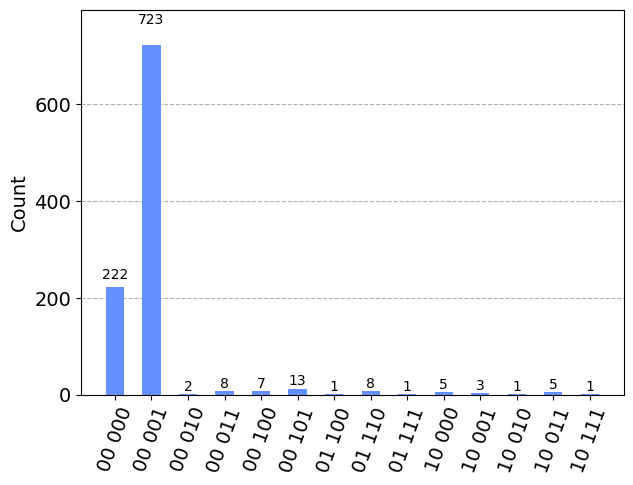

In [16]:
# We choose a simulator for Manila a 5 qubit device, includes errors
backend = FakeManilaV2()
# We run the simulation and get the counts
counts = backend.run(complete_circuit, shots=1000).result().get_counts()
# We plot a histogram to see the possible outcomes and corresponding probabilities
plot_histogram(counts)

Obtendremos algunos resultados incorrectos, pero en general, la mayoría de los resultados son correctos. Esta es una buena señal y significa que incluso con ruido nuestro código puede funcionar.

Aún así, esto no nos dice qué tan bueno es nuestro esquema, ya que no tenemos una comparación con el caso sin la corrección de errores, así que echemos un vistazo a qué tan buenos seríamos sin los pasos de corrección de errores:

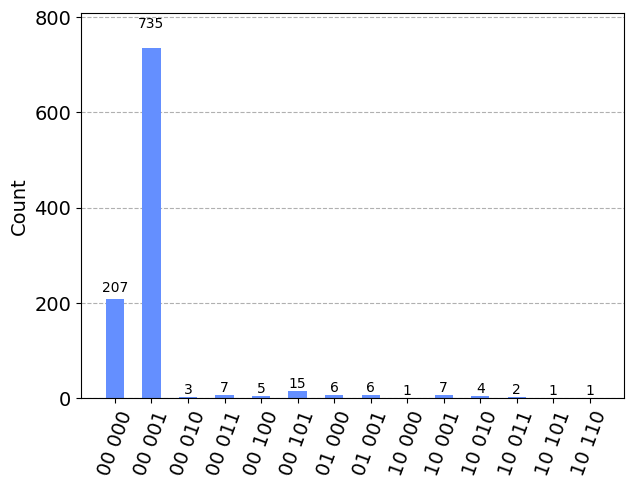

In [17]:
qc3 = (
    initial_state.compose(encoding_circuit)
    .compose(syndrome_circuit)
    .compose(decoding_circuit)
    .compose(measuring_circuit)
)


# We choose a again FakeManila
backend = FakeManilaV2()
# let the simulation run
counts = backend.run(qc3, shots=1000).result().get_counts()
# and plot our results
plot_histogram(counts)

Podemos ver que los resultados son casi iguales, o incluso ligeramente peores, ya que no usamos los qubits de codificación después de crearlos.

Cuando usáramos estos qubits para cálculos, normalmente se introducirían algunos errores, este no es el caso aquí.

Por otro lado, la parte correctora de errores puede introducir errores, ya que también consiste en operaciones que toman tiempo.

Para fines de prueba, construimos un circuito que introduce algunos errores, pero de forma controlada:

- Queremos introducir errores de cambio de bit (bit flip), ya que eso es lo que estamos corrigiendo

- Queremos que los errores en los 3 qubits de codificación sean independientes entre sí

- Queremos que podamos elegir qué tan alta es la probabilidad de que se introduzcan errores

- Queremos tener nuestra entrada en porcentaje, y la salida debe ser un circuito que genere errores con esa probabilidad.

### Ejercicio 4

Crea un circuito para agregar ruido como se definió anteriormente.

0.6435011087932846


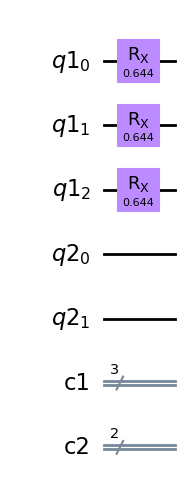

In [29]:
# Add some errors as defined above (only add errors to the encoding qubits)
def make_some_noise(qc, encoding, syndrome, error_percentage):
    encoding_q0, encoding_q1, encoding_q2 = encoding
    syndrome_b0, syndrome_b1 = syndrome

    ####### your code goes here #######
    import numpy as np
    angle = (2*np.arccos(np.sqrt((100-error_percentage)/100.)))
    print(angle)

    qc.rx(angle,encoding)

    return qc


# Constructing a circuit with 10% error rate (for each of the encoding qubit)
noise_circuit = make_some_noise(initialize_circuit(), encoding, syndrome, 10)
noise_circuit.draw(output="mpl")

Usa el código a continuación para probar tu función y crea un circuito que presente una tasa de error del 10%.

In [30]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex4d

grade_ex4d(noise_circuit)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Ahora podemos probar qué tan bien funciona nuestra corrección de errores, cuando introducimos errores con una probabilidad del 10%:

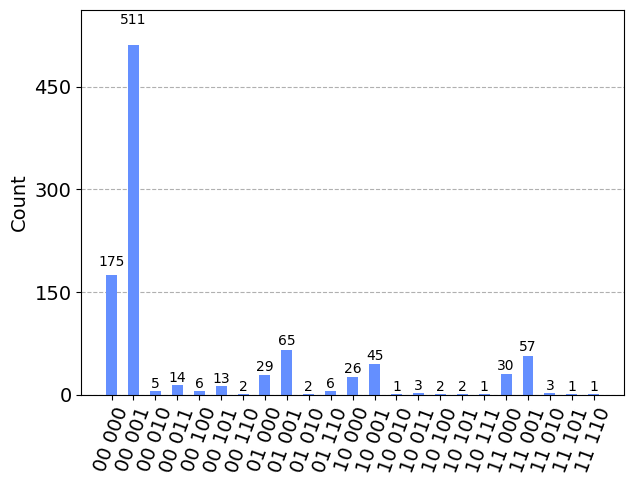

In [31]:
qc4 = (
    initial_state.compose(encoding_circuit)
    .compose(noise_circuit)
    .compose(syndrome_circuit)
    .compose(correction_circuit)
    .compose(decoding_circuit)
    .compose(measuring_circuit)
)


# We choose again FakeManila
backend = FakeManilaV2()
# let the simulation run
counts = backend.run(qc4, shots=1000).result().get_counts()
# and plot our results
plot_histogram(counts)

Podemos ver que nuestros resultados empeoraron, pero todavía obtenemos `001` en la mayoría de los casos.

Ahora hemos creado con éxito nuestro primer código de corrección de errores e incluso lo hemos probado.


Nuestro tipo de corrección de errores, por supuesto, solo corrige errores de cambio de bit, si también queremos corregir errores de fase, necesitaremos un esquema diferente y más qubits.

Si deseas obtener más información sobre la corrección de errores, también puedes consultar:

https://learn.qiskit.org/course/ch-labs/lab-10-quantum-error-correction

# Panorama Breve: Corrección de Errores y Disposición de Hardware

Arriba hemos utilizado un simulador, que ya simula el hardware, pero si queremos ejecutar algo más complejo en un dispositivo real, también tendremos que tener en cuenta ls disposición (layout).

La disposición del dispositivo es importante, ya que no todos los qubits están conectados entre sí, como en el caso ideal, así que tenemos que pensar en eso, de lo contrario, se usarán muchas operaciones de intercambio, que consisten en 3 operaciones cx, que por supuesto también puede introducir errores.


Supongamos que tenemos la siguiente línea de qubits en nuestro dispositivo real

    0 - 1 - 2 - 3 - 4 

¿Cómo se asignarían estos qubits físicos a los qubits lógicos que usamos anteriormente en nuestro circuito de corrección de errores?

Suponemos aquí que la conexión inicial de los qubits (entrelazándolos) es "más fácil" que las partes de corrección de errores, ya que es posible que queramos repetir la parte de corrección de errores varias veces, por lo que solo considerando la parte de corrección de errores, ¿cómo asignarías estos qubits?



Con el siguiente código, puedes ver cómo diferentes disposiciones pueden conducir a diferentes circuitos.


In [ ]:
from qiskit.circuit import IfElseOp

# Fill in a better layout to test!!
initial_layout = [0, 1, 2, 3, 4]

# We use Manila as our potential backend, since it has the wanted layout
backend = FakeManilaV2()

# Temporary workaround for fake backends. For real backends this is not required.
backend.target.add_instruction(IfElseOp, name="if_else")

# And now we transpile the circuit for the backend.
qc_transpiled = transpile(complete_circuit, backend, initial_layout=initial_layout)

qc_transpiled.draw()

Ninguna disposición es perfecta, especialmente porque al principio para entrelazar los 3 qubits necesitamos conexiones diferentes que para la corrección de errores posterior.



La disposición [0, 4, 2, 1, 3] podría detectarse, ya que entonces tenemos conexiones directas para todas las CX necesarios para la corrección, y esa parte se ejecuta potencialmente varias veces.

También podríamos pensar en cómo podríamos hacer mejor la configuración inicial (entrelazado) con estos qubits, ya que también podríamos usar los qubits que se usan como estabilizadores primero para construir el circuito.



Para mostrarte que también puede ser bastante diferente, veamos la siguiente disposición, ¿cómo mapearías los qubits?


    2 - 3 - 4 
            |
           15
            |
           22

Similar al anterior, la disposición [2, 4, 22, 3, 15] tendría sentido, ya que entonces tenemos nuevamente conexiones directas para todos los CX necesarios

Podemos ver que realmente no hay una diferencia entre estas disposiciones, ya que ambas disposiciones son una línea simple. Sin embargo, si observas el backend IBM_Quito, puedes ver que también hay otros dispositivos de 5 qubit. Elegimos Manila porque su disposición es más adecuada para este ejercicio.


¡Estos pequeños ejemplos deberían mostrar que en el hardware real debes cuidar la disposición de los qubits!

**¡Esto será especialmente importante en el ejercicio extra!**